#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.


# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Good Luck!

## Data Exploration & Data Cleaning

In [3]:
# Note : some rows doesn't has records
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [4]:
df.shape

(148654, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [6]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

#-for what we've seen in the df.info,
#-we can determine that the "Notes" & "Status" columns are empty so we can drop it for now.
#- the "Year" column needs to convert it's type from "float64" to "datetime" column.
#-I think we won't need "Id" column in our analysis.


In [7]:
# droping "Notes" , "Status","Id","Benefits" columns
df.drop(columns=["Benefits","Notes", "Status","Id"], axis= 1, inplace = True)

In [8]:
# change the "Year" column from "float64" to "datetime"
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   EmployeeName      148654 non-null  object        
 1   JobTitle          148654 non-null  object        
 2   BasePay           148045 non-null  float64       
 3   OvertimePay       148650 non-null  float64       
 4   OtherPay          148650 non-null  float64       
 5   TotalPay          148654 non-null  float64       
 6   TotalPayBenefits  148654 non-null  float64       
 7   Year              148654 non-null  datetime64[ns]
 8   Agency            148654 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 10.2+ MB


In [10]:
df.head(3)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011-01-01,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011-01-01,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011-01-01,San Francisco


In [11]:
# we need to know how many Job titles, agencies and years in our data
cardinality_columns = ["JobTitle","Agency","Year"]
cardinality_info = df[cardinality_columns].apply(lambda x: len(x.unique()))
print("Cardinality of columns:")
print(cardinality_info)

Cardinality of columns:
JobTitle    2159
Agency         1
Year           4
dtype: int64


In [12]:

df["Agency"].unique()

array(['San Francisco'], dtype=object)

# if there's only one agency "San Francisco", i think we no longer need this column

In [13]:
df= df.drop(columns=["Agency"], axis =1 )

In [14]:
df["Year"].unique()

array(['2011-01-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [15]:
rows_contains_nulls= df[df['EmployeeName'] == 'Not provided']
rows_contains_nulls.head()


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
148646,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,2014-01-01
148650,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,2014-01-01
148651,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,2014-01-01
148652,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,2014-01-01


In [16]:
# deleting these rows
df = df.drop(df[df['EmployeeName'] == 'Not provided'].index)

In [17]:
df["JobTitle"].value_counts()

Transit Operator                        7036
Special Nurse                           4389
Registered Nurse                        3736
Public Svc Aide-Public Works            2518
Police Officer 3                        2421
                                        ... 
BUILDING SERVICES TECHNICIAN               1
TRIAL DELAY REDUCTION COORDINATOR          1
POWERHOUSE ELECTRICIAN SUPERVISOR II       1
CHIEF NURSERY SPECIALIST                   1
Cashier 3                                  1
Name: JobTitle, Length: 2158, dtype: int64

# there's a lot of Jop title in the dataset we need to label or classify it,  i think that the data is not orgniaized for the analysis process but we will try to make some Descriptive Statistics first .


# Descriptive Statistics

In [18]:
# i changed the numbers format for better reading
formatted_describe = df.describe().T[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].applymap(lambda x: '{:,.2f}'.format(x))
formatted_describe

,count,mean,std,min,25%,50%,75%,max
BasePay,"148,045.00","66,325.45","42,764.64",-166.01,"33,588.20","65,007.45","94,691.05","319,275.01"
OvertimePay,"148,650.00","5,066.06","11,454.38",-0.01,0.00,0.00,"4,658.18","245,131.88"
OtherPay,"148,650.00","3,648.77","8,056.60","-7,058.59",0.00,811.27,"4,236.07","400,184.25"
TotalPay,"148,650.00","74,770.33","50,516.20",-618.13,"36,169.96","71,427.24","105,842.96","567,595.43"
TotalPayBenefits,"148,650.00","93,695.08","62,792.50",-618.13,"44,073.34","92,406.02","132,877.99","567,595.43"


In [19]:
df["TotalPayBenefits"].max()

567595.43

#importing matplotlip and seaborn to visualize  the outlairs

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

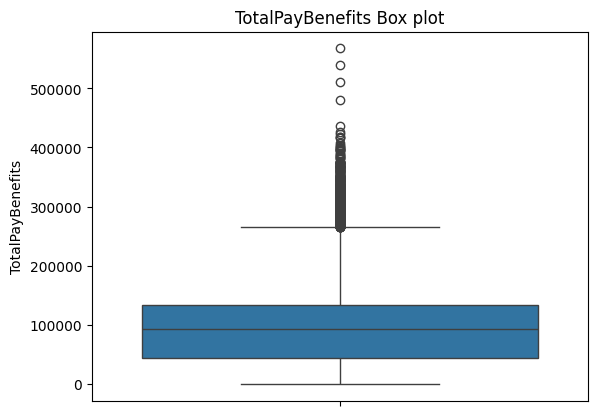

In [21]:

sns.boxplot(df['TotalPayBenefits'])
plt.title("TotalPayBenefits Box plot")
plt.show()

<ipython-input-22-2a9dac931cf5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TotalPayBenefits"])


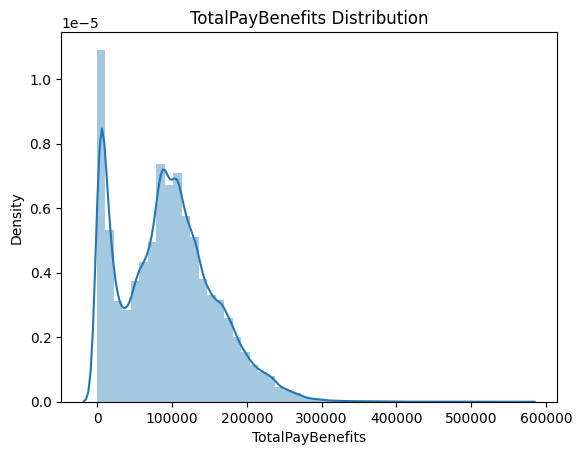

In [22]:
sns.distplot(df["TotalPayBenefits"])
plt.title("TotalPayBenefits Distribution")
plt.show()

# the records of "TotalPayBenefitsr" column is Zero i let's see how many of them

In [23]:
missing_records =df[df["TotalPayBenefits"]==0]
missing_records

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
36156,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,0.0,0.0,2011-01-01
36157,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,0.0,0.0,2011-01-01
36158,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.0,0.0,0.0,2011-01-01
148626,Paulet Gaines,Account Clerk,0.0,0.0,0.0,0.0,0.0,2014-01-01
148627,Brett A Lundberg,General Laborer,0.0,0.0,0.0,0.0,0.0,2014-01-01
148628,Mark W Mcclure,General Laborer,0.0,0.0,0.0,0.0,0.0,2014-01-01
148629,Elizabeth Iniguez,Transcriber Typist,0.0,0.0,0.0,0.0,0.0,2014-01-01
148630,Randy J Keys,Carpenter,0.0,0.0,0.0,0.0,0.0,2014-01-01
148631,Andre M Johnson,Communications Dispatcher 1,0.0,0.0,0.0,0.0,0.0,2014-01-01
148632,Sharon D Owens-Webster,Protective Services Worker,0.0,0.0,0.0,0.0,0.0,2014-01-01


# i think those employess are retired or newly hired, anyway, we don't need these records anymore

In [24]:
# deleting the rows
missing_records=list(df[df["TotalPayBenefits"]==0].index)
df.drop(index=missing_records, inplace=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148624 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   EmployeeName      148624 non-null  object        
 1   JobTitle          148624 non-null  object        
 2   BasePay           148019 non-null  float64       
 3   OvertimePay       148624 non-null  float64       
 4   OtherPay          148624 non-null  float64       
 5   TotalPay          148624 non-null  float64       
 6   TotalPayBenefits  148624 non-null  float64       
 7   Year              148624 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 10.2+ MB


<ipython-input-40-f8fbb1fb6da8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = ".2f")


<Axes: >

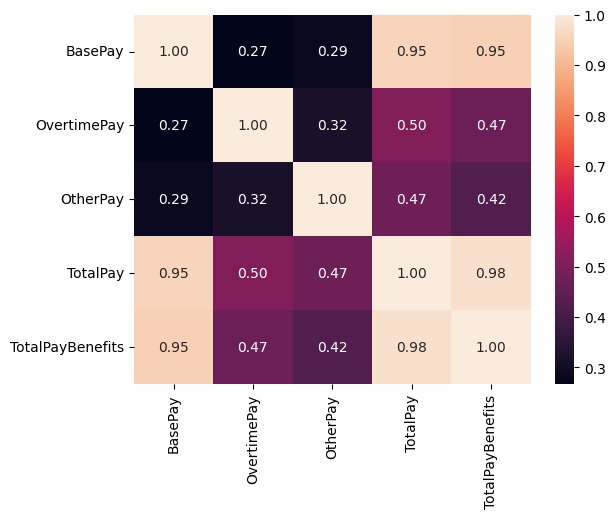

In [40]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

In [72]:
fire_department = df['JobTitle'].str.contains('FIRE|Firefighter')

# Replace the job titles containing 'FIRE DEPARTMENT' with 'Fire Department'
df.loc[fire_department , 'JobTitle'] = 'Fire Department'


In [62]:
police_department = df['JobTitle'].str.contains('POLICE|Police')

# Replace the job titles containing 'FIRE DEPARTMENT' with 'Fire Department'
df.loc[police_department , 'JobTitle'] = 'Police Department'


In [42]:
mediacal_department = df['JobTitle'].str.contains('NURSE|MEDICAL|EMERGENCY|Nurse')

# Replace the job titles containing 'FIRE DEPARTMENT' with 'Fire Department'
df.loc[mediacal_department , 'JobTitle'] = 'Medical Department'


In [74]:
top_jobTitle_order=df["JobTitle"].value_counts(ascending=False).head(10).index
top_jobTitle_order

Index(['Medical Department', 'Police Department', 'Transit Operator',
       'Fire Department', 'Public Svc Aide-Public Works', 'Custodian',
       'TRANSIT OPERATOR', 'Recreation Leader', 'Patient Care Assistant',
       'Deputy Sheriff'],
      dtype='object')

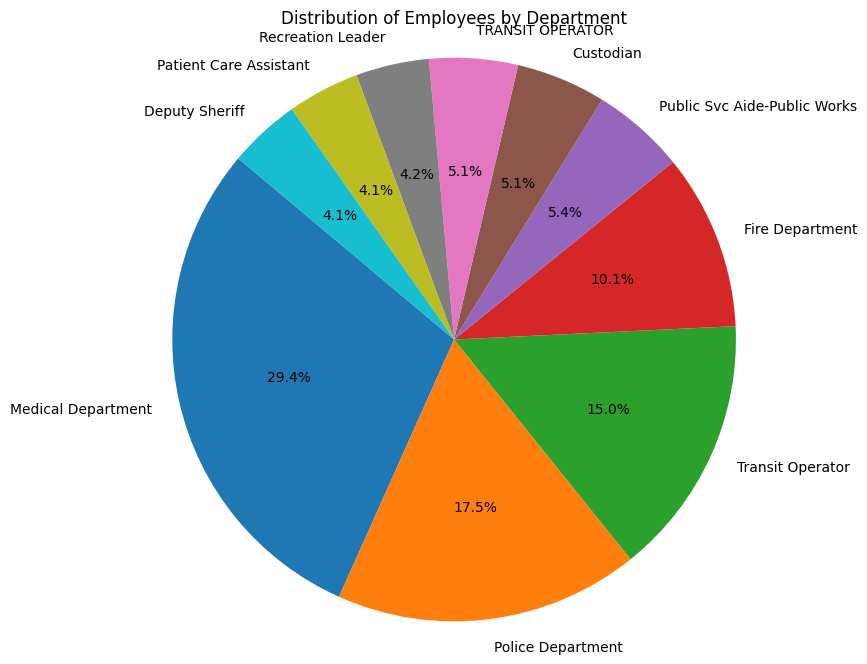

In [92]:
department_counts = df['JobTitle'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Department')
plt.axis('equal')
plt.show()

In [88]:
fire_department_data = df[df['JobTitle'].str.contains('Fire Department')]
police_department_data = df[df['JobTitle'].str.contains('Police Department')]
transit_department_data = df[df['JobTitle'].str.contains('Transit Operator')]
medical_department_data = df[df['JobTitle'].str.contains('Medical Department')]
total_pay_benefits_fire_department = fire_department_data['TotalPayBenefits'].sum()
total_pay_benefits_police_department = police_department_data['TotalPayBenefits'].sum()
total_pay_benefits_transit_department = transit_department_data['TotalPayBenefits'].sum()
total_pay_benefits_medical_department = medical_department_data['TotalPayBenefits'].sum()


print ("Total benefits for Fire Department: ","{:,.2f}".format(total_pay_benefits_fire_department))

print ("Total benefits for police Department: ","{:,.2f}".format(total_pay_benefits_police_department))

print ("Total benefits for transit Department: ","{:,.2f}".format(total_pay_benefits_transit_department))

print ("Total benefits for medical Department: ","{:,.2f}".format(total_pay_benefits_medical_department ))

Total benefits for Fire Department:  798,929,363.23
Total benefits for police Department:  1,170,538,519.02
Total benefits for transit Department:  647,781,613.95
Total benefits for medical Department:  1,227,418,860.83


# the poice and medical departments has the biggest total benefits with 1.2 million and 1.1 million respectively

In [120]:
mean_total_pay_fire_department = total_pay_benefits_fire_department / len(fire_department_data)
mean_total_pay_police_department = total_pay_benefits_police_department / len(police_department_data)
mean_total_pay_transit_department = total_pay_benefits_transit_department / len(transit_department_data)
mean_total_pay_medical_department = total_pay_benefits_medical_department / len(medical_department_data)

print("The mean of Total benefits for Fire Department:", "{:,.2f}".format(mean_total_pay_fire_department))
print("The mean of Total benefits for Police Department:", "{:,.2f}".format(mean_total_pay_police_department))
print("The mean of Total benefits for Transit Department:", "{:,.2f}".format(mean_total_pay_transit_department))
print("The mean of Total benefits for Medical Department:", "{:,.2f}".format(mean_total_pay_medical_department))


The mean of Total benefits for Fire Department: 168,550.50
The mean of Total benefits for Police Department: 142,731.19
The mean of Total benefits for Transit Department: 92,066.74
The mean of Total benefits for Medical Department: 88,859.69


#i've tried to make categories for the jop title column, and this is what could do

Text(0.5, 1.0, 'number of job title per Departmen')

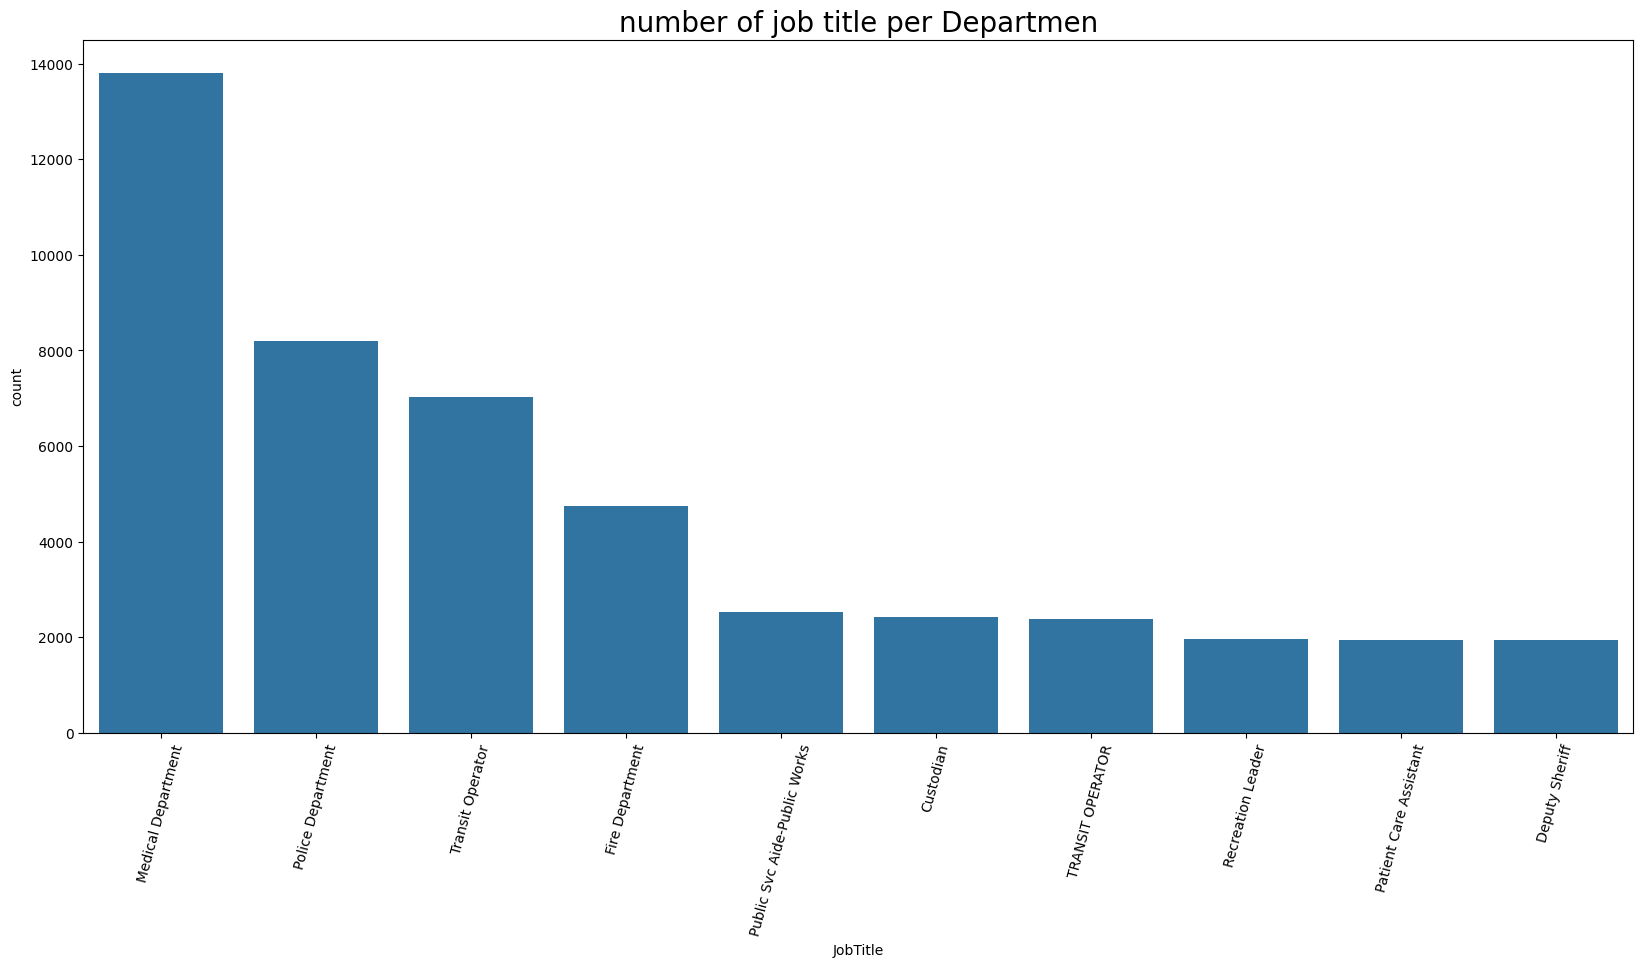

In [75]:
plt.figure(figsize=(20,9))
plt.xticks(rotation = 75)
sns.countplot(data = df , x ="JobTitle", order = top_jobTitle_order)
plt.title("number of job title per Departmen",fontsize= 20)

# the medical department has the biggest number of employees with almost 14K employee and Police department comes next with just 8K employee

In [122]:
department_salaries = df.groupby('JobTitle')['TotalPayBenefits'].sum().reset_index().head(10)

# Sort the departments by total pay (optional)
department_salaries = department_salaries.sort_values(by='TotalPayBenefits', ascending=False)

# Display the result
department_salaries

,JobTitle,TotalPayBenefits
5,ADMINISTRATIVE ANALYST,5947802.68
0,ACCOUNT CLERK,3654960.14
2,ACCOUNTANT INTERN,1393523.66
8,ADMINISTRATIVE ENGINEER,1279614.30
1,ACCOUNTANT,237146.34
9,ADMINISTRATIVE SERVICES MANAGER,231046.74
7,ADMINISTRATIVE ANALYST III,185397.03
6,ADMINISTRATIVE ANALYST II,122994.07
3,"ACPO,JuvP, Juv Prob (SFERS)",80266.37
4,ACUPUNCTURIST,67594.40


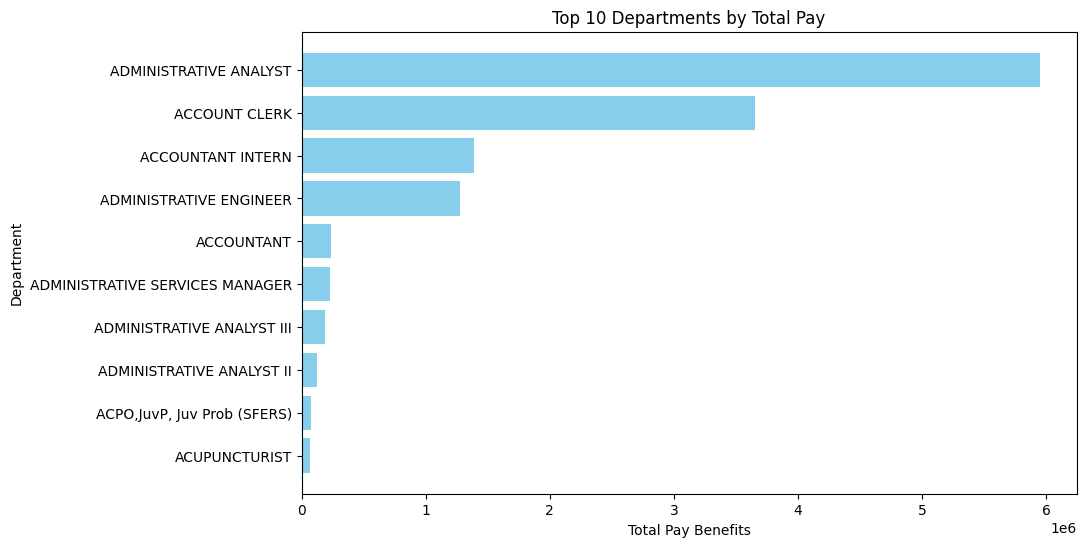

In [123]:
plt.figure(figsize=(10, 6))
plt.barh(department_salaries['JobTitle'], department_salaries['TotalPayBenefits'], color='skyblue')
plt.xlabel('Total Pay Benefits')
plt.ylabel('Department')
plt.title('Top 10 Departments by Total Pay')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest total pay at the top
plt.show()

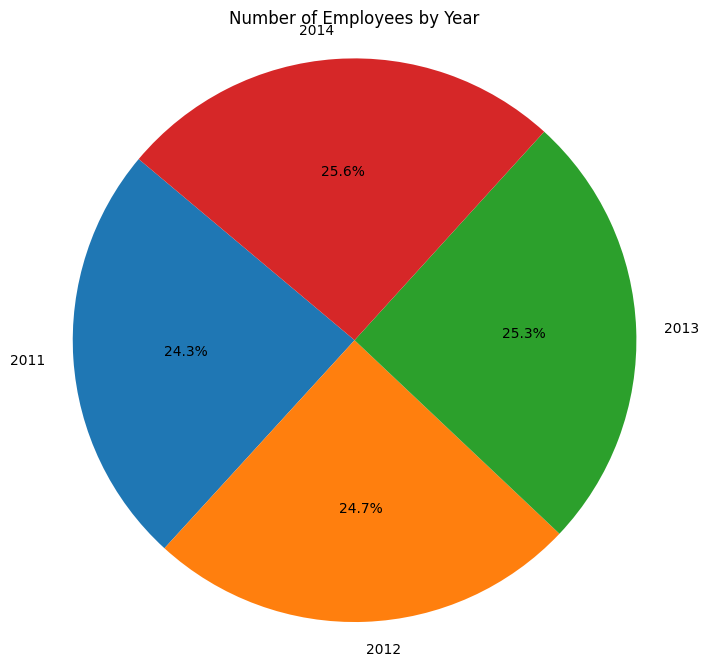

In [124]:
# the number of employees per year
employees_per_year = df.groupby('Year').size().reset_index(name='Number of Employees')

plt.figure(figsize=(8, 8))
plt.pie(employees_per_year['Number of Employees'], labels=employees_per_year['Year'], autopct='%1.1f%%', startangle=140)
plt.title('Number of Employees by Year')
plt.axis('equal')
plt.show()

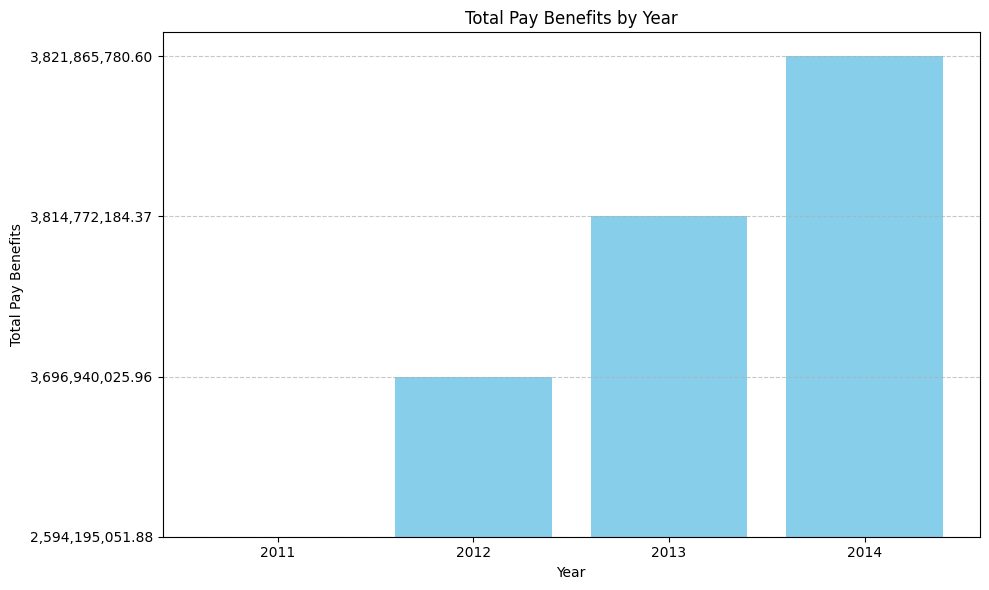

In [107]:

total_pay_benefits_by_year = df.groupby('Year')['TotalPayBenefits'].sum().reset_index()

total_pay_benefits_by_year['TotalPayBenefits'] = total_pay_benefits_by_year['TotalPayBenefits'].apply(lambda x: '{:,.2f}'.format(x))

plt.figure(figsize=(10, 6))
plt.bar(total_pay_benefits_by_year['Year'], total_pay_benefits_by_year['TotalPayBenefits'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Pay Benefits')
plt.title('Total Pay Benefits by Year')
plt.xticks(total_pay_benefits_by_year['Year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# as we see that the company has paid 2.6 million in 2011 and paid about 4 million in 2014
# there's no diffreint in between 2012 to 2014 for the total pay
# but there's a huge different  in 2011, the company has paid more raisd the salaries from 2.6 million to 3.7 milloin which is a strange thing, but we can say that the company had to hire a lot of people this year and with the raise salary for the older employees, that make sense

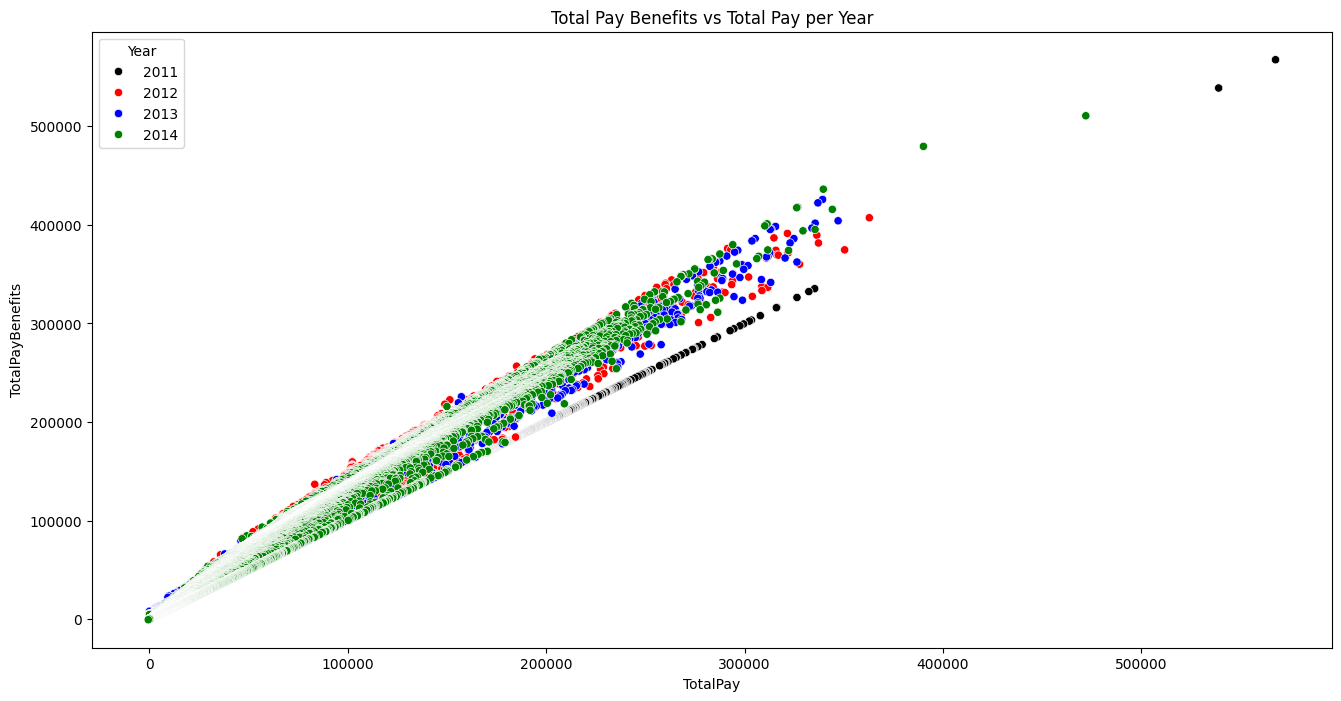

In [110]:
plt.figure(figsize=(16,8))
colors = ["black", "red", "blue", "green"]
#sns.set_palette(sns.color_palette(colors))
sns.scatterplot(x=df['TotalPay'], y=df['TotalPayBenefits'], hue=df['Year'],palette=colors)
plt.title('Total Pay Benefits vs Total Pay per Year')
plt.show()


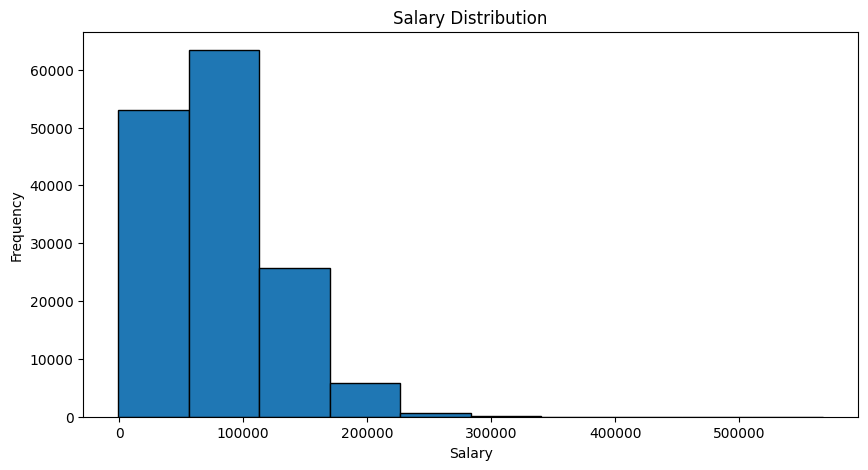

In [113]:
# Histogram for salary distribution
plt.figure(figsize=(10, 5))
plt.hist(df['TotalPay'], bins=10, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

In [129]:
top_departments = ["Police Department", "Medical Department", "Transit Operator", "Fire Department"]

# Filter the data for the top 4 departments
top4_department = df[df["JobTitle"].isin(top_departments)]

In [130]:
top4_department.describe()

,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
count,33659.000000,33786.000000,33786.000000,33786.000000,33786.000000,33786.000000
mean,76746.019403,9713.202059,6964.457851,93135.194601,113757.367793,2012.555200
std,43233.221581,14848.048339,9781.174273,55161.545456,65886.371522,1.107157
min,0.000000,0.000000,-50.190000,0.000000,-33.890000,2011.000000
25%,44053.235000,0.000000,917.140000,49290.355000,58947.825000,2012.000000
50%,73134.000000,4268.680000,3932.380000,94813.200000,118400.500000,2013.000000
75%,112712.560000,12096.700000,9845.695000,135083.640000,165670.097500,2014.000000
max,319275.010000,245131.880000,182234.590000,538909.280000,538909.280000,2014.000000


In [133]:
# Descriptive Statistics in each department per year
department_salary_stats = top4_department.groupby(['JobTitle', 'Year'])['TotalPay'].describe()

department_salary_stats

count           mean           std     min  \
JobTitle           Year                                                
Fire Department    2011  1459.0  145005.665483  42511.129126    5.80   
                   2012  1069.0  142059.304649  48641.569181  963.87   
                   2013  1082.0  148853.762098  49353.144052    0.00   
                   2014  1126.0  136304.858091  49673.111017    0.00   
Medical Department 2011  3670.0   69676.395444  50576.873982   39.32   
                   2012  3390.0   72939.281071  54076.033580    0.00   
                   2013  3365.0   77393.844247  58085.959785    0.00   
                   2014  3388.0   76030.510127  57938.944397    0.00   
Police Department  2011  2512.0  127097.171660  36595.751520  283.86   
                   2012  1919.0  116259.225076  43499.270934   21.98   
                   2013  1869.0  122807.042499  43854.743681    0.00   
                   2014  1901.0  115991.716360  45118.216862    0.00   
Transit Operator   2012  2262.0   65524.890376  27861.715559    0.00   
                   2013  2295.0   67574.008684  29493.313034    0.00   
                   2014  2479.0   61318.264522  32059.619371    0.00   

                                 25%         50%          75%        max  
JobTitle           Year                                                   
Fire Department    2011  125699.0250  144821.790  168419.0550  326373.19  
                   2012  126964.4200  145342.440  170912.8500  337204.86  
                   2013  131946.0825  153279.280  179721.0400  286416.23  
                   2014  113848.8650  143036.970  167642.1500  276495.41  
Medical Department 2011   21981.1900   64062.195  113379.8700  278569.21  
                   2012   18449.2200   70531.910  121812.5275  219000.69  
                   2013   18102.5900   76007.780  129178.8000  239136.48  
                   2014   17938.6850   72815.980  129020.8975  236721.30  
Police Department  2011  114148.3825  127177.465  146340.0875  538909.28  
                   2012  109973.7350  127612.790  140359.0650  321552.11  
                   2013   97797.9000  134705.680  149127.6000  339282.07  
                   2014   85909.2800  128018.920  143432.3500  326716.76  
Transit Operator   2012   50548.0575   72073.925   83445.5375  153180.17  
                   2013   52541.1750   74863.520   86191.3700  157310.65  
                   2014   35706.9650   70946.800   83721.4100  155765.19